In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#data cleanup

Task: learn what is the demand of certain job titles (by monthly job postings) throughout the course of the year (by month) in the United States

In [2]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


1) Filer for US and create a copy of the dataframe

In [18]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",11
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",3
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4


In [19]:
print(id(df_US))
print(id(df))

11470312272
11387165328


2) Make a new column for job_month, which is going to be the index. Here we use string format time '.strftime('%B')' so we get the month in string

In [20]:
df_US['job_month'] = df['job_posted_date'].dt.strftime('%B')
df_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


3) Now create pivot table with the data we have

In [21]:
df_US.pivot_table(index='job_month', columns='job_title_short', aggfunc='size')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


4) Now, update this so that it only includes data analyst, data engineer and data scientist roles

In [57]:
jobs_US = df_US.pivot_table(
    index='job_month', 
    columns='job_title_short', 
    aggfunc='size'
)

data_jobs_US = jobs_US[['Data Analyst', 'Data Scientist', 'Data Engineer']]
# we can use this to now filter the relevant columns we need, that is, the 
# specific job titles we are interested in

In [58]:
data_jobs_US 

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_month,,,
April,6049,4867,2801
August,6634,6318,3269
December,3979,3472,2641
February,6124,4956,3060
January,8494,6915,2655
July,5201,4876,2570
June,5683,4645,2893
March,6218,4779,3183
May,4993,4377,2976


1) The job months are not sorted in order. Therefore, in order to do this, we need to create a new column (job_month_num) so we can order it properly. To do this, we need to:
-   reset_index(): so that the job_month index title is now a column so we can create the new numbered month column
  
-   set_index(): so that once we sorted the values based on 'job_month_num' we can then fix this order and place 'job_month' back as the index

Note: when creating the numbered column, we have to convert it back to a datetime so it can be ordered

In [72]:
data_jobs_US.reset_index(inplace=True)
data_jobs_US
# we reset index so that job_month is now a column that can be sorted by the 
#numbers

job_title_short,job_month,Data Analyst,Data Scientist,Data Engineer,job_month_num
0,April,6049,4867,2801,4
1,August,6634,6318,3269,8
2,December,3979,3472,2641,12
3,February,6124,4956,3060,2
4,January,8494,6915,2655,1
5,July,5201,4876,2570,7
6,June,5683,4645,2893,6
7,March,6218,4779,3183,3
8,May,4993,4377,2976,5
9,November,4531,4175,2793,11


In [73]:
data_jobs_US['job_month_num']=pd.to_datetime(data_jobs_US['job_month'], format='%B').dt.month
data_jobs_US['job_month_num']
# here, we create a new column that is the numerical form for months. We
# convert this new column back to a datetime so we can order it, and specify
# the format we previously had 'job_month' in so the numbers correspond to the
#right month

/var/folders/jv/clmqn0155vd65yhxvfy5c4xr0000gn/T/ipykernel_2802/2104825940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jobs_US['job_month_num']=pd.to_datetime(data_jobs_US['job_month'], format='%B').dt.month


0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: job_month_num, dtype: int32

In [75]:
data_jobs_US.head()
# we now have the added month number, which corresponds to its respective month.
# we can now sort the table by 'job_month_num'

job_title_short,job_month,Data Analyst,Data Scientist,Data Engineer,job_month_num
0,April,6049,4867,2801,4
1,August,6634,6318,3269,8
2,December,3979,3472,2641,12
3,February,6124,4956,3060,2
4,January,8494,6915,2655,1


In [78]:
data_jobs_US.sort_values(by='job_month_num', inplace=True)
data_jobs_US

/var/folders/jv/clmqn0155vd65yhxvfy5c4xr0000gn/T/ipykernel_2802/998202145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jobs_US.sort_values(by='job_month_num', inplace=True)


job_title_short,job_month,Data Analyst,Data Scientist,Data Engineer,job_month_num
4,January,8494,6915,2655,1
3,February,6124,4956,3060,2
7,March,6218,4779,3183,3
0,April,6049,4867,2801,4
8,May,4993,4377,2976,5
6,June,5683,4645,2893,6
5,July,5201,4876,2570,7
1,August,6634,6318,3269,8
11,September,4639,4568,3224,9
10,October,5271,4882,3015,10


Now that it is ordered, we can use set_index for the job_month column so that is displaces the random numbered index. And then, we can use the df.drop() method to drop the 'job_month_num' column.

In [86]:
data_jobs_US.set_index('job_month', inplace=True)
data_jobs_US

job_title_short,Data Analyst,Data Scientist,Data Engineer,job_month_num
job_month,,,,
January,8494,6915,2655,1
February,6124,4956,3060,2
March,6218,4779,3183,3
April,6049,4867,2801,4
May,4993,4377,2976,5
June,5683,4645,2893,6
July,5201,4876,2570,7
August,6634,6318,3269,8
September,4639,4568,3224,9


In [89]:
data_jobs_US.drop(columns= 'job_month_num', inplace=True)
data_jobs_US

/var/folders/jv/clmqn0155vd65yhxvfy5c4xr0000gn/T/ipykernel_2802/451640948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jobs_US.drop(columns= 'job_month_num', inplace=True)


job_title_short,Data Analyst,Data Scientist,Data Engineer
job_month,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


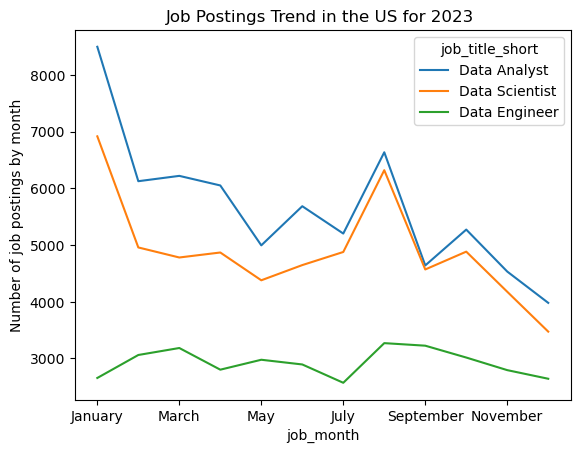

In [94]:
data_jobs_US.plot(kind='line')
plt.ylabel('Number of job postings by month')
plt.title('Job Postings Trend in the US for 2023 ')
plt.show()

Notes:
- Job Postings are highest in January as this is perhaps when companies announce new budgets
- August is an outlier, which can be subject to further investigation
- Engineers job postings are very consistent throughout the year compared to data analysts and data scientists